<h1> EMPIRISCHES PROJEKT MIT DATENSIMULATIONEN </h1>
<h3> von Julian Leopold (16-613-150) und Matthias Steiner (16‐619‐090)</h3>
<br><br><br>

<font size="6"> Inhaltsverzeichnis </font>
- - - 
[<font size="5">1. Einleitung</font>](#1)<br><br>
[<font size="5">2. Vorbereitung der Programmierumgebung</font>](#2)<br><br>
[<font size="5">3. Daten</font>](#4)<br><br>
[<font size="4">3.1 Variablen</font>](#5)<br><br>
[<font size="5">4. Analyse</font>](#6)<br><br>
[<font size="4">4.1 Datenaufbereitung</font>](#7)<br><br>
[<font size="4">4.2 Datensimulation</font>](#8)<br><br>
[<font size="4">4.3 Implementierung des Schätzverfahrens</font>](#9)<br><br>
[<font size="3">4.3.1 Algorithmus zur Schätzung des Effekts der Teilnahme am Beschäftigungsprogramm (inklusive Standardfehler)</font>](#10)<br><br>
[<font size="3">4.3.2 Algorithmus zur Schätzung simulierten Effekte inklusive Standardfehler</font>](#11)<br><br>
[<font size="4">4.4 Evaluierung des Schätzverfahrens</font>](#12)<br><br>

# 1. Einleitung
<div class="alert alert-info">
Dieses empirische Projekt veranschaulicht die Verwendungsweise der Programmiersprache Python in der Analyse von Daten. Dazu werden Beobachtungen aus dem National Supported Work (NSW) Demonstration Programmes untersucht. Dieses in den USA umgesetzte Beschäftigungsprogramm zielte darauf ab, Langzeitarbeitslosen die für den Arbeitsmarkt notwendigen Fähigkeiten und Erfahrungen zu vermitteln, sodass diese nach Programmende selbstständig eine Beschäftigung finden können. <br>
<br>
Das Projekt besteht aus drei Teilen. Zu Beginn werden die Daten eingelesen und aufbereitet. Danach werden neue Daten mithilfe einer Monte Carlo Simulation generiert. In einem dritten Schritt wird eine Schätzstatistik, die den Effekt des Beschäftigungsprogramms misst, für die simulierten und die empirischen Daten berechnet und die Bootstrap Standardfehler dieser Schätzstatistiken ermittelt.<br>
<br>
Wir selbst haben uns den Anspruch gesetzt, einen möglichst grossen Teil des Projektes in objektorientierter Programmierweise zu schreiben. Obwohl dieses Vorgehen bei einem so kleinen Projekt nicht zwingend nötig ist, hilft es die Funktionsweise zu verstehen und bei einer späteren, umfangreicheren Arbeit wieder anzuwenden. <br>
<br>
<b>Arbeitsteilung:</b><br>
Der ganze Code wurde sowohl von Matthias als auch Julian geschrieben, bearbeitet und verbessert. Aus diesem Grund ist eine Abgrenzung die eine sinnvolle, individuelle Bewertung zulassen würde nicht mehr möglich. Wir bitten Sie deshalb die folgende Arbeit, als gemeinsame Leistung zu bewerten.  
<br>
<b>Dokumentation:</b><br>
Um unser Jupyter Notebook übersichtlicher zu gestalten verzichten wir auf ein zusätzliches PDF und Dokumentieren dieses Projekt im Notebook File, nachdem diese Möglichkeit im Unterricht erlaubt wurde.
</div>

<a id="1"></a>
# Vorbereitung der Programmierumgebung
<div class="alert alert-info">
In einem ersten Schritt werden die benötigen Module importiert. Durch den Import dieser Module erhält man innerhalb des Scripts Zugriff auf vordefinierte Funktionen die das Arbeiten vereinfachen.
</div>

In [1]:
# Importieren der benötigten Packages
import numpy as np # Matrixalgebra, Funktionen für Zufallszahlen
import matplotlib.pyplot as plt # 2D-Plots
import pandas as pd # Datenmanipulation
import math # Mathematische Operationen
import ipywidgets as widgets # Widgets für Interaktionen
from ipywidgets import interact, interactive, fixed, interact_manual # Widgets für Interaktionen

# Zufallsgenerator setzen
np.random.seed(12345)

<a id="4"></a>
# 3. Daten
<div class="alert alert-info">
Als nächstes werden die Daten innerhalb der Programmierumgebung verfügbar geladen. Dazu werden die beiden Text-Dateien <a href="http://www.nber.org/~rdehejia/data/nswre74_treated.txt">nswre74_treated.txt</a> und <a href="http://www.nber.org/~rdehejia/data/psid_controls.txt">psid_controls.txt</a> heruntergeladen und im gleichen Arbeitsverzeichnis abgelegt, wo sich auch dieses Jupyter Notebook befindet. Danach können die beiden Datensätze als Pandas Dataframe importiert und zusammengeführt werden.
</div>

In [2]:
# Definition der Spaltennamen
col_names = ["treated", "age", "educ", "black", "hisp", "married", "no-deg", "RE74", "RE75","RE78"]

# Einlesen des Datensatzes nswre74_treated.txt per Link
df_treated = pd.read_csv('nswre74_treated.txt',
                         header=None,
                         sep="  ",
                         names = col_names)

# Einlesen des Datensatzes psid_controls.txt aus dem gleichen Ordner wie das .py file
df_controls = pd.read_csv('psid_controls.txt',
                          header=None,
                          sep="  ",
                          names = col_names)

# Zusammenführen der beiden Datensätze
df_total = pd.concat( [ df_controls, df_treated ], axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


<a id="5"></a>
## 3.1 Variablen
<div class="alert alert-info">
Wir überprüfen nun, ob die importierten Daten mit der geforderten Anzahl von 2675 Beobachtungen und 10 Variablen übereinstimmen. Wir sollten also ein $[2675 \times 10]$ Dataframe erhalten haben.
</div>

In [3]:
# Kontrolle ob das df die Richtige Anzahl an Beobachtungen enthält
if df_total.shape[0] == 2675 and df_total.shape[1] == 10:
    print("Der Datensatz enthält insgesamt",df_total.shape[0],"Beobachtungen und", df_total.shape[1],"Variablen, was mit der geforderten Anzahl übereinstimmt")
else:
    print("Der Datensatz enthält insgesamt",len(df_total), "Beobachtungen und", df_total.shape[1],"Variablen, was nicht mit der geforderten Anzahl übereinstimmt")

Der Datensatz enthält insgesamt 2675 Beobachtungen und 10 Variablen, was mit der geforderten Anzahl übereinstimmt


<a id="6"></a>
# 4. Analyse

<a id="7"></a>
## 4.1 Datenaufbereitung
<div class="alert alert-info">
Die weiteren Schritte des Projekts verlangen eine Bereinigung der Daten. Alle nicht afroamerikanischen Personen werden aus dem Datensatz entfernt, in dem alle Beobachtungen mit einer anderen Zahl als 1 d.h. 0 aus der Dummy-Variable <i>black</i> herausgefiltert werden. Danach enthält die Spalte <i>black</i> keine weiteren relevanten Informationen und kann genauso wie die Spalte <i>hisp</i> und <i>RE74</i> gelöscht werden. Zur Vereinfachung wird die Reihenfolge der restlichen Spalten angepasst und eine neue Indexierung der Zeilen vorgenommen.
</div>

In [4]:
####
# Kontrolle ob die Spalte "black" wirklich nur aus 0 und 1 besteht
print("Die Spalte Black entält die Werte: " , df_total.black.unique())
####

# Alle Nichtafroamerikaner herausfiltern
df = df_total[ df_total.black == 1 ]

# Löschen der Spalten black, hisp und RE74 und neuanordnen der Spalten
col_names = ["treated", "married", "no-deg", "age", "educ", "RE75","RE78"]
df = df[col_names]

# Erneuert die Indexierung des df, nachdem die Beobachtungen anpegasst wurden
df = df.reset_index(drop = True)

Die Spalte Black entält die Werte:  [ 0.  1.]


<a id="8"></a>
## 4.2 Datensimulation
<div class="alert alert-info">
In einem nächsten Schritt werden Daten mit gleichartigen Eigenschaften wie die ursprünglichen Beobachtungen simuliert und dabei 50 neue Dataframes erstellt. Wir verwenden dabei einen objektorientierten Programmierungsansatz und definieren die neue Klasse <i>Monte_Carlo</i>, die einen Dataframe sowie die abhängige Variable als Input-Parameter verlangt. Innerhalb dieser Klasse gibt es insgesamt 6 Methoden:
<ol>
  <li>
      <b>dummies()</b> <br>
      Die Methode prüft, bei welchen Zeilen es sich um Dummy-Variablen handelt und gibt diese in einer Liste zurück.
  </li>
  <li>
      <b>dummy_groups()</b> <br>
      Die Methode ruft eine Liste mit allen möglichen Kombinationen der Ausprägungen der Dummy-Variablen ab.
  </li>
   <li>
      <b>indices()</b> <br>
      Die Methode bestimmt die Zeilenindexe, in welchen die Dummy-Variablen eine bestimmte Kombination an Ausprägungen aufweisen. Für jede Kombinationsgruppen werden diese Indexe in einer Liste gespeichert und diese Listen wiederum in einer Liste zusammengefasst.
  </li>
   <li>
      <b>means()</b> <br>
      Die Methode berechnet für alle Beobachtungen einer Kombinationsgruppe den Durchschnittswert der unabhängigen Nicht-Dummy-Variablen. Für dieses Projekt sind dies die Durchschnittswerte der Variablen <i>age</i>, <i>educ</i> und <i>RE75</i>.
  </li>
   <li>
      <b>covariances()</b> <br>
      Die Methode macht dasselbe wie die Methode means(), nur berechnet sie die Kovarianzen der unabhängigen Nicht-Dummy-Variablen pro Kombinationsgruppe.
  </li>
  <li>
      <b>monte_carlo()</b> <br>
      Mithilfe der vorherigen fünf Methoden führt nun monte_carlo() die Monte Carlo Simulation durch. Der Default Wert für die Anzahl zu simulierenden Dataframes wurde dabei auf 50 gesetzt.
  </li>
</ol>
Die erstellte Klasse wird nun in der Datei <i>Monte_Carlo.py</i> im gleichen Arbeitsverzeichnis wie diese Jupyter Notebook gespeichert.
</div>

In [5]:
%%file Monte_Carlo.py

import numpy as np
import random,time
import ipywidgets as widgets

class Monte_Carlo:
    """
    Monte_Carlo simuliert Daten mit dem selben Durchschnitt
    und der selben Kovarianz wie die eingegebenen Daten
    """
    def __init__(self, df, y):
        self.df = df
        # Liste aller unabhängier Variablen ohne Dummies
        variables = [variable for variable in list(df.columns.values) if variable not in ["treated", "no-deg", "married"] + ["RE78"]]
        # Spaltenindex der ersten unabhängier Variablen ohne Dummies
        self.start = df.columns.get_loc(variables[0])
        # Spaltenindex der letzten Variablen
        self.stopp = self.start + len(variables)
        
    def dummies(self):
        no_dummies = []
        dummies = []
        # Ruft alle Spaltennamen ab
        columns = self.df.columns
        # Findet alle Spalten die KEINE Dummy Variablen enthalten
        for column in columns:
            no_dummies += no_dummies + [column for cell in self.df[column] if cell != 1.0 and cell != 0.0]
        no_dummies = set(no_dummies)
        # Findet alle Spalten die eine Dummy Variabel enthält
        for i in self.df.columns:
            if i not in no_dummies:
                dummies.append(i)
        return dummies

    def dummy_groups(self):
        groups = []
        # Ruft die Vorherige Methode auf um alle Dummy Spalten zu bekommen
        dummies = self.dummies()
        # Macht für jede Zeile einen Vektor, der aus den Ausprägungen aller Dummy Variablen besteht
        # und fasst all diese Vektoren in einer List zusammen
        all_groups = [row for row in self.df[dummies].as_matrix().astype(int).tolist()]
        # Macht aus der Vektor-Liste eine neue Liste, in welchem jeder Vektor einmalig ist
        for group in all_groups:
            if group not in groups:
                groups.append(group)
        return groups
    
    def indices(self):
        # Kreiert eine Liste mit Unterlisten, welche die Indexe für jede Dummy-Gruppe enthalten
        indices = []
        # Kreiert eine Liste aller unabhängigen Variablen ohne Dummies
        dummies = self.dummies()
        for i in self.dummy_groups():
            # Dieser Schritt könnte Mithilfe der dummies() Methode veralgemeinert werden.
            # Do this as list comprehension
            index = self.df[ ( self.df[dummies[0]] == i[0] ) & ( self.df[dummies[1]] == i[1] ) & ( self.df[dummies[2]] == i[2] ) ].index
            indices.append(index)
        return indices

    # Berechnet die Durchschnitte für jede Dummy-Gruppe
    def means(self):
        indices = self.indices()
        means = []
        for i in indices:
            mean = self.df.iloc[ i, self.start : self.stopp ].mean()
            means.append(mean)
        return means
        
    # Berechnet die Kovarianzen für jede Dummy-Gruppe
    def covariances(self):
        covs = []
        indices = self.indices()
        for i in indices:
            cov = self.df.iloc[ i, self.start : self.stopp ].cov()
            covs.append(cov)
        return covs
    
    def monte_carlo(self, iterations = 50):
        # Zuvor definierte Methoden werden abgerufen
        indices = self.indices()
        means = self.means()
        covariances = self.covariances()
        df = self.df
        dummy_groups = self.dummy_groups()
        
        # Widget für Ladebalken
        w = widgets.IntProgress(
        value=0,
        min=0,
        max=iterations,
        step=1,
        description='Loading:',
        bar_style='success',
        orientation='horizontal'
        )
        display(w)
        
        # Eine leere Liste in der die simulierten dfs angefügt werden.
        mc_dfs = []
        # Standardmässig werden 50 Iterationen durchgeführt
        for i in range(0,iterations):
            # Originales df wird kopiert
            df_MC = df.copy()
            # Für jede der 8 Dummy-Gruppen werden die Werte durch Simulationen ersetzt, 
            # welche den Mittelwert und die Kovarianz berücksichtigen.
            for j in range(0,len(dummy_groups)):
                df_MC.iloc[ indices[j], self.start : self.stopp ] = np.random.multivariate_normal( means[j], covariances[j], len( indices[j] ) )        
            mc_dfs.append(df_MC)
            w.value = w.value + 1
        w.close()

        return mc_dfs

Overwriting Monte_Carlo.py


In [6]:
run Monte_Carlo.py

<div class="alert alert-info">
Nachdem die erstellte Funktion importiert wurde, kann nun ihr Docstring-Beschreibung abgerufen werden
</div>

In [7]:
??Monte_Carlo()

<div class="alert alert-info">
Dank der zuvor definierten Funktion ist  die eigentliche Implementierung der Monte Carlo Simulation sehr effizient und wenige Zeilen Code reichen dafür aus. Diese einfache Handhabung veranschaulicht den Vorteil der objektorientierten Programmierung. <br>
Nach der Simulation von neuen Datensätzen müssen die Variablen <i>age</i> und <i>educ</i> ganzzahlig gemacht werden, da wir nur volles Alter und volle Ausbildungsjahre berücksichtigen.
</div>

In [8]:
# Klasse Initialisieren
MonteC = Monte_Carlo(df, "RE78")
dummy_groups = MonteC.dummy_groups()
indices = MonteC.indices()
means = MonteC.means()
covariances = MonteC.covariances()

# Schreiben eine Liste mit 50 simulierten Dataframes.
df_sim_list = MonteC.monte_carlo()

# Die Variablen age und educ werden auf ganze Zahlen gerundet
for i in range(0, 50):
    df_sim_list[i]["age"] = df_sim_list[i]["age"].round(decimals=0)
    df_sim_list[i]["educ"] = df_sim_list[i]["educ"].round(decimals=0)

A Jupyter Widget

<div class="alert alert-info">
Die folgende Tabelle vergleicht die Maxima und Minima eines zufälligen simulierten Dataframes mit jenen der empirischen Daten. Es fällt auf, dass die simulierten Daten die empirischen Beobachtungen oftmals unter- bzw. überschreiten, was nicht erwünscht ist. Gemäss Email-Rückfrage (vom 30.05.18) werden diese Werte durch die empirischen Maxima und Minima ersetzt.<br>
<br>
Alternativ könnten durch die folgende Methode Daten innerhalb eines Intervalls zufällig generiert werden. <br>
<code>import scipy.stats
samples = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
</code>
</div>

In [9]:
# Daten mit empirischen und simulierten Maxima und Minima
data = { 'age': [ df["age"].max(), df_sim_list[3]["age"].max(), df["age"].min(), df_sim_list[3]["age"].min()], 
         'educ': [ df["educ"].max(), df_sim_list[3]["educ"].max(), df["educ"].min() , df_sim_list[3]["educ"].min()], 
         'RE75': [ df["RE75"].max(), df_sim_list[3]["RE75"].max(), df["RE75"].min(), df_sim_list[3]["RE75"].min()]}
df1 = pd.DataFrame( data, index = [ 'Max empirisch', 'Max simuliert', 'Min empirisch', "min simuliert" ] )
display(df1)

,RE75,age,educ
Max empirisch,51842.371000,55.0,17.0
Max simuliert,42064.435764,66.0,16.0
Min empirisch,0.000000,17.0,2.0
min simuliert,-13263.703456,-1.0,2.0


In [10]:
# Ersetzt in den simulierten Daten die Werte oberhalb und unterhalb der emirschen Maxima btw. Minima
for i in range(0, 50):    
    df_sim_list[i].iloc[df_sim_list[i][df_sim_list[i]["age"] > round(df["age"].max())].index, 3:4] = round(df["age"].max())
    df_sim_list[i].iloc[df_sim_list[i][df_sim_list[i]["age"] < round(df["age"].min())].index, 3:4] = round(df["age"].min())
    df_sim_list[i].iloc[df_sim_list[i][df_sim_list[i]["educ"] > round(df["educ"].max())].index, 4:5] = round(df["educ"].max())
    df_sim_list[i].iloc[df_sim_list[i][df_sim_list[i]["educ"] < round(df["educ"].min())].index, 4:5] = round(df["educ"].min())
    df_sim_list[i].iloc[df_sim_list[i][df_sim_list[i]["RE75"] > round(df["RE75"].max())].index, 5:6] = round(df["RE75"].max())
    df_sim_list[i].iloc[df_sim_list[i][df_sim_list[i]["RE75"] < round(df["RE75"].min())].index, 5:6] = round(df["RE75"].min())

<div class="alert alert-info">
Es gibt nun 50 Dataframes mit simulierten Daten. Einen Überblick über die simulierten Daten kann man sich mithilfe der folgenden Grafiken verschaffen. Der simulierte Dataframe kann mit dem Schieberegler und die unabhängige Variable durch die Tasten ausgewählt werden können. Im Histogramm wird die empirische Verteilung mit der jeweiligen simulierten Verteilung verglichen. Der Scatter Plot hat die simulierte Verteilung auf der y-Achse und die empirische Verteilung auf der x-Achse. Zu guter Letzt findet man einen Boxplot der jeweiligen simulierten Werte.
</div>

In [11]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def plot_func(df_mc, variable):
    fig = plt.figure(figsize = (8, 8))
    ax1 = fig.add_subplot(2, 2, (3,4))
    # Boxplot
    ax1.boxplot(df_sim_list[df_mc][variable], vert = False)
    ax1.set_title('Boxplot')
    ax2 = fig.add_subplot(2, 2, 2)
    # Scatter Plot
    ax2.scatter(df_sim_list[df_mc][variable], df[variable], marker = 'x', s = 10)
    # Regressionslinie
    ax2.plot(np.unique(df_sim_list[df_mc][variable]), np.poly1d(np.polyfit(df_sim_list[df_mc][variable], df[variable], 1))(np.unique(df_sim_list[df_mc][variable])), "r")
    ax2.set_title('Scatter Plot')
    ax3 = fig.add_subplot(2, 2, 1)
    # Hisogramm der simulierten Daten
    ax3.hist(df_sim_list[df_mc][variable], alpha = 0.5)
    # Hisogramm der empirischen Daten
    ax3.hist(df[variable], alpha = 0.5)
    ax3.set_title('Histogramm')
    plt.show()
    
# Folgender Bereich definiert die Widgets, welche für die
# Interaktion mit dem Benutzer verwendet werden.
interact(plot_func, 
         df_mc = widgets.IntSlider(
                value=0,
                min=0,
                max=49,
                step=1,
                description='Datensatz:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='d'),
         variable = widgets.ToggleButtons(
                    options=['RE75', 'age', 'educ'],
                    description='Variable:',
                    disabled=False,
                    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
                    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
                    ))

A Jupyter Widget

<function __main__.plot_func>

<a id="9"></a>
## 4.3 Implementierung des Schätzverfahrens

<a id="10"></a>
### 4.3.1 Algorithmus zur Schätzung des Effekts der Teilnahme am Beschäftigungsprogramm (inklusive Standardfehler)
<div class="alert alert-info">
In einem nächsten Schritt wird der Effekt des Beschäftigungsprogrammes auf die Teilnehmer untersucht. Dazu verwenden wir die Schätzstatistik $\hat{\theta}$.
$$
\hat{\theta} = \frac{1}{N}\sum^{N}_{i = 1}(\mu(1) - \mu(1))
$$
<br>
Die Schätzstatistik wurde unter Verwendung einer OLS-Regression berechnet. Wobei $\mu(1)$ der geschätzten abhängien Variable <i>RE78</i> entspricht. $\mu(1)$ wurde mit den Koeffizienten aus einer Regression mit nur Teilnehmern geschätzt. Diese Regression kann wie folgt beschrieben werden:
<br>
<br>
$$
\rm\small
\begin{align}
\begin{bmatrix}
RE78_{1} \\
RE78_{2} \\
RE78_{3} \\
\vdots \\
RE78_{156} \\
\end{bmatrix}
 =
 \begin{bmatrix}
1 & treated_{1} & married{1} & no-deg_{1} & age_{1} & educ_{1} & RE75_{1}\\
1 & treated_{2} & married{2} & no-deg_{2} & age_{2} & educ_{2} & RE75_{2}\\
1 & treated_{3} & married{3} & no-deg_{3} & age_{3} & educ_{3} & RE75_{3}\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & treated_{156} & married_{156} & no-deg_{156} & age_{156} & educ_{156} & RE75_{156}\\
\end{bmatrix}   
\times    
\begin{bmatrix}
\beta_{0} \\
\beta_{1} \\
\beta_{2} \\
\vdots \\
\beta_{6} \\
\end{bmatrix}
+
\begin{bmatrix}
u_{1} \\
u_{2} \\
u_{3} \\
\vdots \\
u_{156} \\
\end{bmatrix}
\end{align}
$$
<br>
$\mu(0)$ wiederum sind die geschätzten <i>RE78</i> aus einer Regression mit nur Nichtteilnehmern. Die Schätzstatistik nimmt nun die durchschnittliche Differenz zwischen geschätztem Teilnehmerlohn und geschätztem Nichtteilnehmerlohn im Jahr 1978 an.
<br>
<br>
Um später Konfidenzintervalle berechnen zu können, benötigt man die Standardfehler der Schätzstatistiken. Zur Berechnung dieser verwenden wir die Standard-Bootstrapmethode und imitieren 19 Replikationen der ursprünglichen Daten. Aus jeder dieser Replikationen wird die Teststatistik $\hat{\theta}_{b}$ berechnet und schliesslich der Standardfehler $\sigma(\hat{\theta})$ aus den 19 Teststatistiken ermittelt.
</div>

<div class="alert alert-info">
Wir erstellen zuerst die Funktion boostrap(), da diese in der nachfolgenden Klasse verwendet wird. boostrap() nimmt einen Dataframe, auf den die Bootstrap-Methode angewendet werden soll, als Input-Parameter. Daneben kann auch noch die Anzahl an Bootstrap Replikationen festgelegt werden. Standardmässig ist dieser Wert auf 19 Replikationen gesetzt.<br>
<br>
Durch Ausführen der Funktion werden zufällig Beobachtungen aus dem eingegeben Dataframe genommen und diese zu einem neuen Dataframe zusammengesetzt. Dadurch entsteht die geforderte Anzahl an replizierten Datensätzen. Diese Funktion wird im selben Arbeitsverzeichnis wie dieses Jupyter Notebok in der Datei bootstrap.py abgespeichert.
</div>

In [12]:
%%file bootstrap.py

import numpy as np

def bootstrap(df, B = 19):
    """
    Die Funktion erzeugt eine definierte Anzahl Bootstrap Replikationen
    für ein gegebenes Pandas Dataframe
    """
    df_bootstrapped_list = []
    for i in range(0,B):
        # Zeilen mit zufälligen Indexzahlen Beobachtungen auswählen und neues df daraus erstellen 
        df_random = df.loc[np.random.randint(0, df.shape[0], df.shape[0]), :]
        df_bootstrapped_list.append(df_random)
    return df_bootstrapped_list

Overwriting bootstrap.py


<div class="alert alert-info">
Zur Berechnung der empirischen Teststatistik wenden wir erneut die objektorientierte Programmierung an. Wir definieren die Klasse Test_Statistics(). Diese Klasse benötigt einen Dataframe, eine Dummy-Variable als Vergleich (hier <i>treated</i>), eine abhängige Variable (hier <i>RE78</i>), sowie eine unbestimmte Anzahl an unabhängigen Variablen.<br>
<br>
Zuerst wird das eingegebene Dataframe mit einer Spalte bestehend aus Einsen ergänzt. Diese Spalte wird benötigt für die berechnung des Achsenabschnittsparameters. Danach werden die Berechnungen in den einzelnen Methoden durchgeführt:
<ol>
    <li>
    Die Methoden 1 - 9 berechnen die einzelnen Elemente der Schätzstatistik. Auf diese Weise kann nicht nur die Schätzstatistik als Ganzes, sonder auch ihre einzelnen Komponenten abgerufen werden.
    </li>
    <li>
    Die Methode theta_hat() berechnet die Schätzstatistik $\hat{\theta}$.
    </li>
    <li>
    Die Methode standard_error_boot() beinhaltet die zuvor definierte Bootstrap Funktion. In einem ersten Teil werden die Bootstrap Replikationen der empirischen Daten erzeugt. Standardmässig werden 19 Replikationen induziert. Danach wird für jede Replikation die Schätzstatistik $\hat{\theta}$ berechnet und aus diesen Schätzstatistiken der Standardfehler ermittelt.
    </li>
</ol>
Auch diese Funktion wird in einer Datei im selben Arbeitsverzeichnis wie dieses Jupyter Notebook abgespeichert.
</div>

In [13]:
%%file Test_Statistics.py

from bootstrap import bootstrap
import numpy as np
import math

class Test_Statistics:
    """
    Berechnet die Schätzstatistik Theta-Dach sowie
    den Standardfehler einer Bootstrap-Replikation.
    """

    def __init__(self, df, compare, y, *x):
        # Wir verwenden einen Klon damit das originale df erhalten bleibt
        self.df = df.copy()
        # Spalte mit Einsen an das df anfügen.
        self.df["ones"] = np.ones(self.df.shape[0])
        self.compare = compare
        self.y = y
        self.x = x
        # Spalte aller unabhängigen Variablen und des Achsenabschnittparameters.
        self.columns = list(x) + ["ones"]
        
    def X(self): # Macht aus den X und nicht den Y Zeilen eine Matrix
        X = self.df[self.columns].as_matrix()
        return X
        
    def X1(self):
        # Teilmatrix von Teilnehmern
        X1 = self.df.loc[self.df[self.compare] == 1][self.columns].as_matrix()
        return X1
    
    def X0(self):
        # Teilmatrix von nicht Teilnehmern
        X0 = self.df.loc[self.df[self.compare] == 0][self.columns].as_matrix()
        return X0
    
    def y1(self):
        # Einkommen 1978 von Teilnehmern
        y1 = self.df.loc[self.df[self.compare] == 1][self.y].as_matrix()
        return y1
    
    def y0(self):
        # Einkommen 1978 von nicht Teilnehmern
        y0 = self.df.loc[self.df[self.compare] == 0][self.y].as_matrix()
        return y0
    
    def b1(self):
        X1 = self.X1()
        y1 = self.y1()
        # Schätzung der Steigungsparameter nur mit Teilnehmern
        b1 = np.dot(np.linalg.inv(np.dot(X1.T, X1)), np.dot(X1.T, y1))
        return b1
    
    def b0(self):
        X0 = self.X0()
        y0 = self.y0()
        # Schätzung der Steigungsparameter nur mit Nichtteilnehmern
        b0 = np.dot(np.linalg.inv(np.dot(X0.T, X0)), np.dot(X0.T, y0))
        return b0
    
    def mu_1(self):
        X = self.X()
        b1 = self.b1()
        # Schätzung Einkommen 1978 mit Koeffizienten von Teilnehmern
        mu_1 = np.dot(X, b1)
        return mu_1
    
    def mu_0(self):
        X = self.X()
        b0 = self.b0()
        # Schätzung Einkommen 1978 mit Koeffizienten von Nichtteilnehmern
        mu_0 = np.dot(X, b0)
        return mu_0
    
    def theta_hat(self):
        X = self.X()
        b1 = self.b1()
        b0 = self.b0()
        # Berechnung des Effekts Theta-Dach
        theta_hat = (np.dot(X, b1) - np.dot(X, b0)).mean()
        return theta_hat
    
    def standard_error_boot(self, B = 19):
        # Führt die bootstrap() Funktion aus und erzeugt default-mässig 19 Replikationen
        df_b_list = bootstrap(self.df, B)
        # Schätzstatistik Theta-Dach für jede Replikation berechnen
        theta_hat_b_list = [Test_Statistics(df_b, self.compare, self.y, *self.x).theta_hat() for df_b in df_b_list]
        #Standardfehler der Schätzstatistiken berechnen
        std_theta_hat = np.std(theta_hat_b_list)
        return std_theta_hat

Overwriting Test_Statistics.py


In [14]:
run Test_Statistics.py

<div class="alert alert-info">
Nun kommen wir zur eigentlichen Implementierung der Schätzung des Effekts am Beschäftigungsprogramm. Auch hier zeigt sich der Vorteil einer objektorientierten Programmierweise. Der Effekt und der Standardfehler können mit wenigen Eingaben abgerufen werden.
</div>

In [15]:
# Klasse initialisieren
Effects = Test_Statistics(df, 'treated', "RE78", "age", "educ", "married", "no-deg", "RE75")
# Berechnung der Schätzstatistik der empirischen Daten
theta_hat = Effects.theta_hat()
# Berechnung des Standardfehlers 
std_theta_hat = Effects.standard_error_boot()

In [16]:
print("Theta-Dach des empirischen Dataframes: \t\t\t\t\t", theta_hat)
print("Bootstrap Standardfehler des Theta-Dach des empirischen Dataframes: \t", std_theta_hat)

Theta-Dach des empirischen Dataframes: 					 -4707.66428492
Bootstrap Standardfehler des Theta-Dach des empirischen Dataframes: 	 2077.91292753


<a id="11"></a>
### 4.3.2 Algorithmus zur Schätzung simulierten Effekte inklusive Standardfehler

<div class="alert alert-info">
Das gleiche Vorgehen wie unter Abschnitt 4.3.1 wird nun auch für jeden in der Monte Carlo Simulation generierten Dataframe durchgeführt. Erneut werden der Effekt mithilfe der Schätzstatistik $\hat{\theta}_{sim}$ sowie der Standardfehler $\hat{\sigma}(\hat{\theta}_{sim})$ durch die Bootstrap-Methode berechnet. <br>
<br>
Da sich die Schätzstatistik der simulierten Daten $\hat{\theta}_{sim}$ von jener der empirischen Daten unterscheidet, definieren wir eine neue Klasse Test_Statistics_Sim(), welche die abgeänderte Schätzstatistik berechnet. Dazu können wir die verwendeten Methoden aus der Klasse Test_Statistics() erben, sodass diese auch in der neuen Klasse verfügbar sind.<br>
<br>
Mithilfe der geerbten Attribute und Methoden, die bereits in Test_Statistics() definiert wurden, berechnen wir alle notwendigen Variablen, um die Gleichungen 7 - 9 zu berechnen.<br>
<br>
Gleichungen 8 und 9, zur Berechnung von $\mu_{sim}(1)$ und $\mu_{sim}(0)$ werden durch die Methoden .mu_sim() und .mu_sim0() definiert. 
Mithilfe dieser Methoden definieren wir Gleichung 7, zur Berechnung von $\hat{\theta}_{sim}$ als Methode .theta_hat_sim()<br>
<br>
Zuletzt wird wieder mithilfe der Bootstrap Methode der Standardfehler $\hat{\sigma}(\hat{\theta}_{sim})$ durch die Methode standard_error_sim_boot() berechnet, welche die veränderte Berechnung von $\hat{\theta}_{sim}$ berücksichtigt.
</div>

In [17]:
%%file Test_Statistics_Sim.py

import numpy as np
import math

# Funktionen die in der standard_error Methode gebraucht werden importieren.
from bootstrap import bootstrap
from Test_Statistics import Test_Statistics

class Test_Statistics_Sim(Test_Statistics):
    """
    Berechnet die angepasste Schätzstatistik Theta-Dach für Simulationsdaten sowie
    den Standardfehler einer Bootstrap-Replikation von diesen Daten.
    """
    def __init__(self, df, compare, y, *x):
        super().__init__(df, compare, y, *x)
         # Attribute für die simulierten Dataframes
        self.N = self.df.shape[0]
        self.u = [np.random.normal() for i in range(0,self.N)]
        self.v = [np.random.normal() for i in range(0,self.N)]
        
    def K(self):
        # Spalten von X
        K = self.X().shape[1]
        return K
    
    def N1(self):
        # Anzahl Teilnehmer
        N1 = len(self.df.loc[self.df[self.compare] == 1])
        return N1
    
    def N0(self):
        # Anzahl Nichtteilnehmer
        N0 = len(self.df.loc[self.df[self.compare] == 0])
        return N0
    
    def ssr1(self):
        # Sum of Squared Residuals aus der Regression mit nur Teilnehmer
        ssr1 = sum((np.dot(self.X1(),self.b1())-self.y1())**2)
        return ssr1
    
    def ssr0(self):
        # Sum of Squared Residuals aus der Regression mit nur Nichtteilnehmer
        ssr0 = sum((np.dot(self.X0(),self.b0())-self.y0())**2)
        return ssr0
        
    def mu_sim1(self):
        mu_sim1 = np.dot(self.X(),self.b1()) + np.dot(self.u,math.sqrt(self.ssr1()/(self.N1()-self.K())))
        return mu_sim1

    def mu_sim0(self):
        mu_sim0 = np.dot(self.X(),self.b0()) + np.dot(self.v,math.sqrt(self.ssr0()/(self.N0()-self.K())))
        return mu_sim0
    
    def theta_hat_sim(self):
        theta_hat_sim = sum(self.mu_sim1()-self.mu_sim0())/self.N
        return theta_hat_sim

    def standard_error_sim_boot(self, B = 19):
        # Führt die bootstrap() Funktion aus und erzeugt default-mässig 19 Replikationen
        df_b_list = bootstrap(self.df, B)
        # Schätzstatistik Theta-Dach für jede Replikation berechnen
        theta_hat_b_list = [Test_Statistics_Sim(df_b, self.compare, self.y, *self.x).theta_hat_sim() for df_b in df_b_list]
        #Standardfehler ausrechnen
        std_theta_hat = np.std(theta_hat_b_list)
        return std_theta_hat

Overwriting Test_Statistics_Sim.py


In [18]:
run Test_Statistics_Sim.py

<div class="alert alert-info">
Nachdem wir die Klasse geschrieben haben, werden wir diese nun initialisieren und für jeden der 50 simulierten Dataframes die Teststatistik $\hat{\theta}_{sim}$ sowie die Standardabweichung der Teststatistik $\hat{\sigma}(\hat{\theta}_{sim})$ berechnen.

Da die simulierten Dataframes in einer Liste abgespeichert sind, loopen wir durch diese und erstellen zwei neue Listen für die Teststatistik (theta_hat_sim_list) und für den Standardfehler der  Teststatistik (std_theta_hat_sim_list).
</div>

In [19]:
progress = 0 # Da die Berechnung einige Zeit benötigt printen wir den Fortschritt.
theta_hat_sim_list = []
std_theta_hat_sim_list = []

for df_sim in df_sim_list:
        
    # Initialisierung der Klasse Test_Statistics_Sim() für jeden simulierten df
    Effects_Sim = Test_Statistics_Sim(df_sim, 'treated', "RE78", "age", "educ", "married", "no-deg", "RE75")
    # Schätzstatistik für jeden simulierten df
    theta_hat_sim = Effects_Sim.theta_hat_sim()
    # Bootstrap Standardfehler für jeden simulierten df
    std_theta_hat_sim = Effects_Sim.standard_error_sim_boot()
    
    theta_hat_sim_list.append(theta_hat_sim)
    std_theta_hat_sim_list.append(std_theta_hat_sim)
    
    # Zeigt kontinuierlich den Fortschritt, da die Berechnung länger dauert.
    progress += 1
    if progress == 50:
        print("Fertig")
    elif progress%5 == 0:
        print("Berechnung für", progress,"von",len(df_sim_list),"Dataframes abgeschlossen")

Berechnung für 5 von 50 Dataframes abgeschlossen
Berechnung für 10 von 50 Dataframes abgeschlossen
Berechnung für 15 von 50 Dataframes abgeschlossen
Berechnung für 20 von 50 Dataframes abgeschlossen
Berechnung für 25 von 50 Dataframes abgeschlossen
Berechnung für 30 von 50 Dataframes abgeschlossen
Berechnung für 35 von 50 Dataframes abgeschlossen
Berechnung für 40 von 50 Dataframes abgeschlossen
Berechnung für 45 von 50 Dataframes abgeschlossen
Fertig


In [20]:
# Ergebnisse der Berechnungen anzeigen
simulated_test_stats = pd.DataFrame({r'$\hat{\theta}_{sim}$' : theta_hat_sim_list,
                                     r'$\hat{\sigma}(\hat{\theta}_{sim})$' : std_theta_hat_sim_list})

print("Die ersten fünf Teststatistiken der simulierten Daten weisen folgende Werte auf:")
simulated_test_stats.head()

Die ersten fünf Teststatistiken der simulierten Daten weisen folgende Werte auf:


,$\hat{\sigma}(\hat{\theta}_{sim})$,$\hat{\theta}_{sim}$
0,1869.108398,-9855.030124
1,2123.989279,-4111.503265
2,2307.198998,-8084.477744
3,2324.438667,-7665.764357
4,3148.446634,-3860.792054


<a id="12"></a>
## 4.4 Evaluierung des Schätzverfahrens
<div class="alert alert-info">
In einem letzten Schritt beurteilen wir unsere Implementierungen sowie das erzielte Ergebnis. Dazu wird zuerst eine Übersicht der empirischen Daten mit Mittelwerten und Standardabweichungen pro Variable für Teilnehmer und Nichtteilnehmer erzeugt und in einer Tabelle zusammengefasst.
</div>

In [21]:
# Trennung nach Teilnehmern und Nichtteilnehmern
df_treated = df[df.treated == 1]
df_not_treated = df[df.treated == 0]
df.columns

means_treated = []
std_treated = []
means_not_treated = []
std_not_treated = []
cols = []

# Durchschnitt und Standardabweichung für jede Spalte ausser "treated" berechnen
for col in df.columns: 
    if col != "treated":
        cols.append(col)
        means_treated.append(df_treated[col].mean())
        std_treated.append(df_treated[col].std())
        means_not_treated.append(df_not_treated[col].mean())
        std_not_treated.append(df_not_treated[col].std())
        
# in einem Pandas DataFrame zusammenfügen.
tabelle1 = pd.DataFrame({
    r'$\mu$' ' Teilnehmer' : means_treated, 
    r'$\sigma$' ' Teilnehmer' : std_treated,
    r'$\mu$' ' Nichtteilnehmer' : means_not_treated,
    r'$\sigma$' ' Nichtteilnehmer' : std_not_treated},
    index = cols
)

<div class="alert alert-info">
Als nächstes benötigen wir die Resultate der Schätzung des simulierten und des tatsächlichen Effekts zusammen mit ihren Mittelwerten und Standardabweichungen. Auch diese Resultate werden in einer Tabelle zusammengefasst.
</div>

In [22]:
# Erste Zeile
Zeile1 = pd.DataFrame([theta_hat, np.mean(theta_hat_sim_list), np.std(theta_hat_sim_list)])
# Zweite Zeile
Zeile2 = pd.DataFrame([std_theta_hat, np.mean(std_theta_hat_sim_list), np.std(std_theta_hat_sim_list)])
# Zusammenführen der beiden Zeilen
tabelle2 = pd.concat( [ Zeile1.T, Zeile2.T ], axis = 0).reset_index(drop = True) # not very elegant since transposed
# Anpassen der Spaltennamen
tabelle2.columns = ["Beobachtet", r'$\mu$' " Simuliert", r'$\sigma$' " Simuliert"]
# Anpassen der Zeilennamen
tabelle2.index = [r'$\hat{\theta}$' " bzw. " r'$\hat{\theta}_{sim}$', 
                  r'$\hat{\sigma}(\hat{\theta})$' " bzw. " r'$\hat{\sigma}(\hat{\theta}_{sim})$']

<div class="alert alert-info">
Aus den beiden Tabellen können einige interessante Schlussfolgerungen gezogen werden:
<ol>
    <li>
    Wirft man zuerst einen Blick auf den durchschnittlichen Teilnehmer und Nichtteilnehmer, fällt auf, dass deutlich mehr der Teilnehmer im Schnitt über keinen Abschluss verfügen (no-deg==1) und auch unverheiratet sind (married==0). Die Anzahl Bildungsjahre wiederum ist im Schnitt bei beiden Gruppen ähnlich. Daneben sticht auch hervor, dass die Einkommensdifferenz zwischen Teilnehmern und Nichtteilnehmern von 1975 bis 1978 rapide zunimmt.
    </li>
    <li>
    Vergleicht man das durchschnittliche Einkommen der Teilnehmer und Nichtteilnehmer im Jahr 1978, fällt auf, dass die Teilnehmer des Beschäftigungsprogrammes im Schnitt 9733 Dollar weniger verdienen als Nichtteilnehmer. Folglich scheint das Beschäftigungsprogramm einen negativen Effekt auf das Einkommen zu haben. Der geschätzte Effekt $\hat{\theta}$ aus den empirischen Daten geht auch von einem negativen Zusammenhang aus. Der geschätzte Unterschied liegt jedoch nur bei rund 4707 Dollar, die ein Teilnehmer weniger verdient. Der Durchschnitt der Schätzstatistik der simulierten Daten ist mit rund -7063 Dollar wiederum deutlich näher am tatsächlichen durchschnittlichen Unterschied.
    </li>
    <li>
    Der durchschnittliche Bootstrap Standardfehler der simulierten Beobachtungen nimmt einen ähnlichen Wert an wie der Bootrstrap Standardfehler der empirischen Daten.
    </li>
</ol>
Es ist nicht klar zu sagen, wieso der Effekt des Beschäftigungsprogramms als negativen Wert berechnet wird. Möglichkeiten dafür sind, dass eine ungeeignete Referenzgruppe ausgewählt wurde oder dass dieses falsche Anreize für die Teilnehmer schafft. Um dies herauszufinden müssen aber mehr Informationen zur Durchführung des Projekts betrachtet werden.
</div>

In [23]:
display(tabelle1)
display(tabelle2)

,$\mu$ Nichtteilnehmer,$\mu$ Teilnehmer,$\sigma$ Nichtteilnehmer,$\sigma$ Teilnehmer
married,0.788462,0.185897,0.408727,0.390277
no-deg,0.530449,0.724359,0.499472,0.448276
age,34.161859,25.980769,10.518550,7.299555
educ,10.391026,10.314103,2.982719,2.059767
RE75,13975.246583,1490.722088,9169.791885,3296.553550
RE78,15869.556700,6136.320647,11837.640474,8143.465973


,Beobachtet,$\mu$ Simuliert,$\sigma$ Simuliert
$\hat{\theta}$ bzw. $\hat{\theta}_{sim}$,-4707.664285,-6698.965160,1954.774908
$\hat{\sigma}(\hat{\theta})$ bzw. $\hat{\sigma}(\hat{\theta}_{sim})$,2077.912928,2663.160156,592.824320


<div class="alert alert-info">
Für jede simulierte Schätzstatistik $\hat{\theta}_{sim}$ wird nun ein 95%-Konfidenzintervall mithilfe der Bootstrap Standardfehler berechnet. Danach wird geprüft, bei welchem Anteil der Konfidenzintervallen sich die empirische Schätzstatistik $\hat{\theta}$ innerhalb des Intervalls befindet.
</div>

In [24]:
CIs = []
for i in range(0, len(theta_hat_sim_list)):
    # Konfindenzintervall für jede Simulation
    CI = [theta_hat_sim_list[i] - 1.959966 * std_theta_hat_sim_list[i], theta_hat_sim_list[i] + 1.959966 * std_theta_hat_sim_list[i]]
    CIs.append(CI)
pd.DataFrame(CIs,  columns=["2.5th percentile", "97.5th percentile"]).head()

,2.5th percentile,97.5th percentile
0,-13518.419034,-6191.641214
1,-8274.450036,51.443506
2,-12606.509337,-3562.446152
3,-12221.585113,-3109.943601
4,-10031.640409,2310.056301


In [25]:
# Prüfen ob die berechnete Teststatistik im Intervall liegt
anteil = 0
for CI in CIs:
    if theta_hat > CI[0] and theta_hat < CI[1]:
        anteil += 1

# Prozentualer Anteil, welcher innerhalb des Intervalls liegt
perc_theta_hat_in_CI = int(anteil/len(CIs)*100)
print("In ",perc_theta_hat_in_CI,"% der Fälle ist theta_hat im 95% CI von theta_hat_sim.")

In  84 % der Fälle ist theta_hat im 95% CI von theta_hat_sim.


<div class="alert alert-info">
Das Konfidenzintervall für jede simulierte Schätztstatistik $\hat{\theta}_{sim}$ gibt den Bereich an, in dem 95% der Schätzungen für diese Simulation liegen. Liegt nun die empirische Schätzstatistik $\hat{\theta}$ bei vielen der simulierten Werte innerhalb des jeweiligen Konfidenzintervalles, ist dies ein Hinweis dafür, dass simulierte Werte und empirische Daten eine identische Verteilung aufweisen. In diesem Projekt liegen rund 84% der empirischen Schätzstatistik innerhalb des Konfindenzintervalls der simulierten Schätzstatistik.
</div>

### Plot der Konfidenzintervalle

In [26]:
# Daten für das CI Plot vorbereiten
theta_hat_50 = []
CI_upper = []
CI_lower = []
for i in range(0,50):
    theta_hat_50.append(theta_hat)
    CI_upper.append(CIs[i][1])
    CI_lower.append(CIs[i][0])

In [27]:
%%file plot_CI.py

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import matplotlib.mlab as mlab
import math

def plot_CI(theta_hat, lb, ub, color_mean=None, color_shading=True):
    # Die gefärbte Fläche der Konfidenzintervalle anzeigen
    plt.fill_between(range(pd.DataFrame(theta_hat).shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # Das theta_hat darüber plotten
    plt.plot(theta_hat, color_mean)

Overwriting plot_CI.py


In [28]:
run plot_CI.py

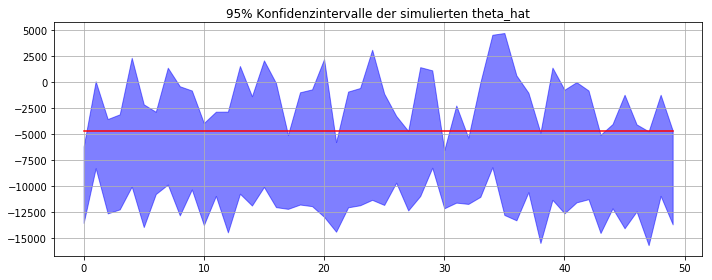

In [29]:
# plot the data
fig = plt.figure(1, figsize=(10, 4))
plot_CI(theta_hat_50, CI_upper, CI_lower, color_mean='r', color_shading='b')

plt.title("95% Konfidenzintervalle der simulierten theta_hat")
plt.tight_layout()
plt.grid()
plt.show()

<div class="alert alert-info">
Dieses Plot zeigt die Konfidenzintervalle der Teststatistik für jeden der 50 simulierten Datensätze. Die rote Linie zeigt, den Schätzer $\hat{\theta}$, welchen wir aus den empirischen Daten berechnet haben. Im Plot wird sichtbar, wie häufig $\hat{\theta}$ in den berechneten Konfidenzintervallen liegt.
<div>